# Final Project - ASL Alphabet

## 1. Pre-processing

Imports:

In [92]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from random import shuffle
from matplotlib import pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from numpy import load
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
TRAIN_DIR = 'asl_alphabet_train/asl_alphabet_train'
TEST_DIR = 'asl_alphabet_test/asl_alphabet_test'

### Get images:

Classes:

In [4]:
classes = ['A', 'B', 'C', 'D','del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N','nothing', 'O', 'P', 'Q', 'R', 'S','space', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z' ]

In [5]:
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator
gen = ImageDataGenerator()

In [6]:
iterator = gen.flow_from_directory(TRAIN_DIR, target_size=(32,32),classes=(classes))

Found 87000 images belonging to 29 classes.


Shape of the data:

In [7]:
batch = iterator.next()
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 32, 32, 3)
float32
255.0
(32, 29)
float32


Display a sample of the data:

C:\Users\marni\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

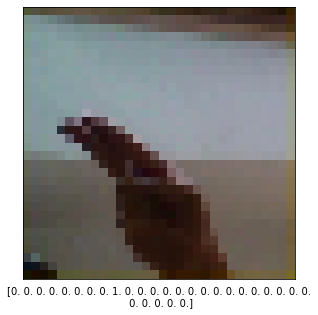

In [8]:
figure = plt.figure()
plt.figure(figsize=(16,5))
plt.xticks([])
plt.yticks([])
plt.xlabel(batch[1][4])
plt.imshow(batch[0][4].astype(int))

Pre-process the data:

In [9]:
imgdatagen = ImageDataGenerator(rescale=1/255.0, validation_split = 0.2)
batch_size = 64
height, width = (32,32)

In [10]:
train_dataset = imgdatagen.flow_from_directory(
TRAIN_DIR,
target_size = (height, width),
batch_size = batch_size,
class_mode='categorical',
subset = 'training',
shuffle=True
)

val_dataset = imgdatagen.flow_from_directory(
TRAIN_DIR,
target_size = (height, width),
class_mode='categorical',
batch_size = batch_size,
subset = 'validation',
shuffle=False
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## 2. Baseline

Determine baseline accuracy needed:

In [15]:
print(1/len(classes)*100)

3.4482758620689653


In [16]:
baseline_model = tf.keras.Sequential()
baseline_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
baseline_model.add(layers.MaxPooling2D((2,2)))
baseline_model.add(layers.Conv2D(64, (3,3), activation='relu'))
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(128, activation='relu'))
baseline_model.add(layers.Dense(29, activation='softmax'))
baseline_model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [17]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 29)                3741      
                                                        

In [18]:
baseline_model_history = baseline_model.fit(train_dataset, epochs=5, batch_size=batch_size, validation_data=val_dataset)

Epoch 1/5
1088/1088 [==============================] - 726s 667ms/step - loss: 1.2107 - acc: 0.6419 - val_loss: 1.5386 - val_acc: 0.5380
Epoch 2/5
1088/1088 [==============================] - 167s 153ms/step - loss: 0.2001 - acc: 0.9364 - val_loss: 1.6877 - val_acc: 0.6155
Epoch 3/5
1088/1088 [==============================] - 162s 149ms/step - loss: 0.0762 - acc: 0.9753 - val_loss: 1.8739 - val_acc: 0.6306
Epoch 4/5
1088/1088 [==============================] - 165s 152ms/step - loss: 0.0424 - acc: 0.9868 - val_loss: 2.2052 - val_acc: 0.6448
Epoch 5/5
1088/1088 [==============================] - 169s 155ms/step - loss: 0.0280 - acc: 0.9912 - val_loss: 2.2121 - val_acc: 0.6434


In [17]:
def plot_epochs(x, y_A, style_A, label_A,
    y_B, style_B, label_B,
    title, x_label, y_label):
    plt.clf()
    plt.plot(x, y_A, style_A, label = label_A)
    plt.plot(x, y_B, style_B, label = label_B)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [21]:
loss = baseline_model_history.history['loss']
val_loss = baseline_model_history.history['val_loss']
acc = baseline_model_history.history['acc']
val_acc = baseline_model_history.history['val_acc']

In [16]:
plot_epochs(range(1, len(loss) + 1),
loss, 'bo', 'Training', val_loss, 'b',
'Validation', 'Training and validation loss',
'Epochs', 'Loss')

NameError: name 'plot_epochs' is not defined

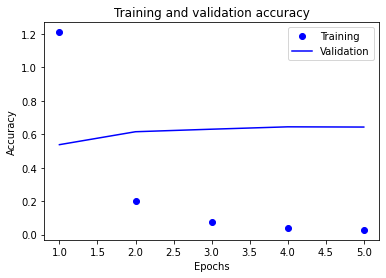

In [23]:
plot_epochs(range(1, len(loss) + 1),
loss, 'bo', 'Training', val_acc, 'b',
'Validation', 'Training and validation accuracy',
'Epochs', 'Accuracy')

# 3. More complex implementations

### 3.1 Adding dropout

In [11]:
dropout_model = tf.keras.Sequential()
dropout_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
dropout_model.add(layers.MaxPooling2D((2,2)))
dropout_model.add(layers.Conv2D(64, (3,3), activation='relu'))
dropout_model.add(layers.Flatten())
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(128, activation='relu'))
dropout_model.add(layers.Dense(29, activation='softmax'))
dropout_model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [12]:
dropout_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                        

In [13]:
dropout_model_history = dropout_model.fit(train_dataset, epochs=10, batch_size=batch_size, validation_data=val_dataset)

Epoch 1/10
1088/1088 [==============================] - 1063s 977ms/step - loss: 1.2322 - acc: 0.6314 - val_loss: 1.7288 - val_acc: 0.5278
Epoch 2/10
1088/1088 [==============================] - 176s 162ms/step - loss: 0.2759 - acc: 0.9111 - val_loss: 1.6298 - val_acc: 0.5777
Epoch 3/10
1088/1088 [==============================] - 192s 177ms/step - loss: 0.1414 - acc: 0.9528 - val_loss: 1.4743 - val_acc: 0.6419
Epoch 4/10
1088/1088 [==============================] - 190s 175ms/step - loss: 0.0926 - acc: 0.9685 - val_loss: 1.7620 - val_acc: 0.6569
Epoch 5/10
1088/1088 [==============================] - 184s 169ms/step - loss: 0.0693 - acc: 0.9765 - val_loss: 1.6405 - val_acc: 0.6811
Epoch 6/10
1088/1088 [==============================] - 174s 160ms/step - loss: 0.0551 - acc: 0.9814 - val_loss: 1.8490 - val_acc: 0.6870
Epoch 7/10
1088/1088 [==============================] - 182s 167ms/step - loss: 0.0484 - acc: 0.9845 - val_loss: 1.7683 - val_acc: 0.6854
Epoch 8/10
1088/1088 [===========

Results:

In [14]:
loss = dropout_model_history.history['loss']
val_loss = dropout_model_history.history['val_loss']
acc = dropout_model_history.history['acc']
val_acc = dropout_model_history.history['val_acc']

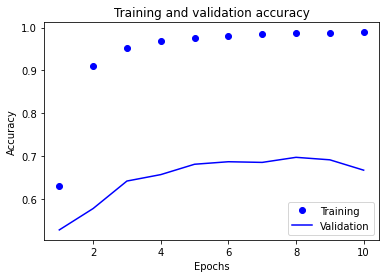

In [19]:
plot_epochs(range(1, len(loss) + 1),
acc, 'bo', 'Training', val_acc, 'b',
'Validation', 'Training and validation accuracy',
'Epochs', 'Accuracy')

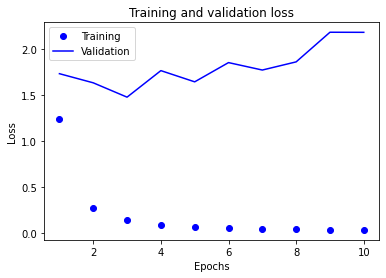

In [20]:
plot_epochs(range(1,len(loss) + 1),
            loss, 'bo','Training',
            val_loss,'b','Validation',
            'Training and validation loss',
            'Epochs','Loss')

### 3.2 Adding more dropout between layers

In [25]:
dropout_model2 = tf.keras.Sequential()
dropout_model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
dropout_model2.add(layers.MaxPooling2D((2,2)))
dropout_model2.add(layers.Dropout(0.5))
dropout_model2.add(layers.Conv2D(64, (3,3), activation='relu'))
dropout_model2.add(layers.Flatten())
dropout_model2.add(layers.Dropout(0.5))
dropout_model2.add(layers.Dense(128, activation='relu'))
dropout_model2.add(layers.Dense(29, activation='softmax'))
dropout_model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [26]:
dropout_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_5 (Dropout)         (None, 10816)             0         
                                                      

In [27]:
dropout_model2_history = dropout_model2.fit(train_dataset, epochs=10, batch_size=batch_size, validation_data=val_dataset)

Epoch 1/10
1088/1088 [==============================] - 170s 155ms/step - loss: 1.5909 - acc: 0.5209 - val_loss: 1.8003 - val_acc: 0.4565
Epoch 2/10
1088/1088 [==============================] - 180s 165ms/step - loss: 0.5215 - acc: 0.8285 - val_loss: 1.5860 - val_acc: 0.5322
Epoch 3/10
1088/1088 [==============================] - 176s 162ms/step - loss: 0.3050 - acc: 0.8988 - val_loss: 1.3197 - val_acc: 0.6203
Epoch 4/10
1088/1088 [==============================] - 176s 161ms/step - loss: 0.2181 - acc: 0.9262 - val_loss: 1.4508 - val_acc: 0.6360
Epoch 5/10
1088/1088 [==============================] - 181s 166ms/step - loss: 0.1704 - acc: 0.9429 - val_loss: 1.3243 - val_acc: 0.6693
Epoch 6/10
1088/1088 [==============================] - 179s 165ms/step - loss: 0.1383 - acc: 0.9540 - val_loss: 1.6153 - val_acc: 0.6197
Epoch 7/10
1088/1088 [==============================] - 185s 170ms/step - loss: 0.1176 - acc: 0.9597 - val_loss: 1.3745 - val_acc: 0.6774
Epoch 8/10
1088/1088 [============

In [38]:
loss = dropout_model2_history.history['loss']
val_loss = dropout_model2_history.history['val_loss']
acc = dropout_model2_history.history['acc']
val_acc = dropout_model2_history.history['val_acc']

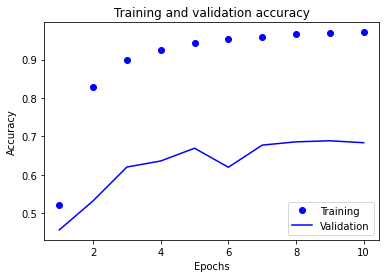

In [39]:
plot_epochs(range(1, len(loss) + 1),
acc, 'bo', 'Training', val_acc, 'b',
'Validation', 'Training and validation accuracy',
'Epochs', 'Accuracy')

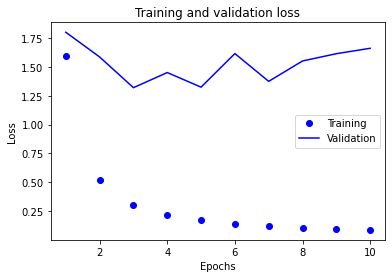

In [40]:
plot_epochs(range(1,len(loss) + 1),
            loss, 'bo','Training',
            val_loss,'b','Validation',
            'Training and validation loss',
            'Epochs','Loss')

### 3.3 Adding another Conv2D layer

Callbacks are added to monitor certain metrics and adjust learning rate or cause a quick exit in order to save time and computing power.

In [32]:
callbacks = [keras.callbacks.EarlyStopping(monitor='acc',patience=1),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)]

In [33]:
dropout_model3 = tf.keras.Sequential()
dropout_model3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
dropout_model3.add(layers.MaxPooling2D((2,2)))
dropout_model3.add(layers.Dropout(0.5))
dropout_model3.add(layers.Conv2D(64, (3,3), activation='relu'))
dropout_model3.add(layers.MaxPooling2D((2,2)))
dropout_model3.add(layers.Conv2D(64, (3,3), activation='relu'))
dropout_model3.add(layers.Flatten())
dropout_model3.add(layers.Dropout(0.5))
dropout_model3.add(layers.Dense(128, activation='relu'))
dropout_model3.add(layers.Dense(29, activation='softmax'))
dropout_model3.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [35]:
dropout_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)         

In [34]:
dropout_model3_history = dropout_model3.fit(train_dataset, 
                                            epochs=10, 
                                            batch_size=batch_size, 
                                            callbacks=callbacks, 
                                            validation_data=val_dataset)

Epoch 1/10
1088/1088 [==============================] - 148s 135ms/step - loss: 2.0414 - acc: 0.3827 - val_loss: 1.6562 - val_acc: 0.4751 - lr: 0.0010
Epoch 2/10
1088/1088 [==============================] - 151s 138ms/step - loss: 0.8634 - acc: 0.7140 - val_loss: 1.3615 - val_acc: 0.5768 - lr: 0.0010
Epoch 3/10
1088/1088 [==============================] - 166s 153ms/step - loss: 0.5434 - acc: 0.8144 - val_loss: 1.1943 - val_acc: 0.6440 - lr: 0.0010
Epoch 4/10
1088/1088 [==============================] - 164s 150ms/step - loss: 0.3943 - acc: 0.8643 - val_loss: 1.4395 - val_acc: 0.6394 - lr: 0.0010
Epoch 5/10
1088/1088 [==============================] - 155s 143ms/step - loss: 0.3119 - acc: 0.8933 - val_loss: 1.1966 - val_acc: 0.6954 - lr: 0.0010
Epoch 6/10
1088/1088 [==============================] - 166s 153ms/step - loss: 0.2600 - acc: 0.9103 - val_loss: 1.3767 - val_acc: 0.6882 - lr: 0.0010
Epoch 7/10
1088/1088 [==============================] - 162s 149ms/step - loss: 0.2223 - acc: 

In [41]:
loss = dropout_model3_history.history['loss']
val_loss = dropout_model3_history.history['val_loss']
acc = dropout_model3_history.history['acc']
val_acc = dropout_model3_history.history['val_acc']

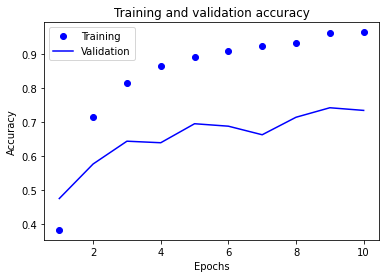

In [42]:
plot_epochs(range(1, len(loss) + 1),
acc, 'bo', 'Training', val_acc, 'b',
'Validation', 'Training and validation accuracy',
'Epochs', 'Accuracy')

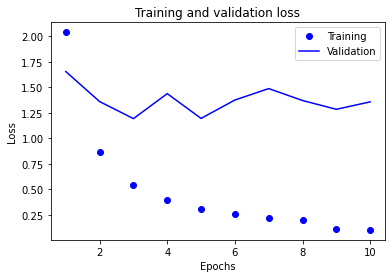

In [43]:
plot_epochs(range(1,len(loss) + 1),
            loss, 'bo','Training',
            val_loss,'b','Validation',
            'Training and validation loss',
            'Epochs','Loss')

### 3.4 Increasing epochs

In [45]:
dropout_model4 = tf.keras.Sequential()
dropout_model4.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
dropout_model4.add(layers.MaxPooling2D((2,2)))
dropout_model4.add(layers.Dropout(0.5))
dropout_model4.add(layers.Conv2D(64, (3,3), activation='relu'))
dropout_model4.add(layers.MaxPooling2D((2,2)))
dropout_model4.add(layers.Conv2D(64, (3,3), activation='relu'))
dropout_model4.add(layers.Flatten())
dropout_model4.add(layers.Dropout(0.5))
dropout_model4.add(layers.Dense(128, activation='relu'))
dropout_model4.add(layers.Dense(29, activation='softmax'))
dropout_model4.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [46]:
dropout_model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 64)         

In [47]:
dropout_model4_history = dropout_model4.fit(train_dataset, 
                                            epochs=20, 
                                            batch_size=batch_size, 
                                            callbacks=callbacks, 
                                            validation_data=val_dataset)

Epoch 1/20
1088/1088 [==============================] - 195s 178ms/step - loss: 2.0009 - acc: 0.3979 - val_loss: 1.6793 - val_acc: 0.4879 - lr: 0.0010
Epoch 2/20
1088/1088 [==============================] - 191s 176ms/step - loss: 0.8288 - acc: 0.7244 - val_loss: 1.2266 - val_acc: 0.6235 - lr: 0.0010
Epoch 3/20
1088/1088 [==============================] - 192s 176ms/step - loss: 0.5082 - acc: 0.8263 - val_loss: 1.1617 - val_acc: 0.6733 - lr: 0.0010
Epoch 4/20
1088/1088 [==============================] - 191s 176ms/step - loss: 0.3665 - acc: 0.8743 - val_loss: 1.0079 - val_acc: 0.7279 - lr: 0.0010
Epoch 5/20
1088/1088 [==============================] - 7630s 7s/step - loss: 0.2918 - acc: 0.8997 - val_loss: 1.1363 - val_acc: 0.7130 - lr: 0.0010
Epoch 6/20
1088/1088 [==============================] - 138s 127ms/step - loss: 0.2487 - acc: 0.9160 - val_loss: 1.0256 - val_acc: 0.7425 - lr: 0.0010
Epoch 7/20
1088/1088 [==============================] - 127s 117ms/step - loss: 0.2142 - acc: 0.

In [48]:
loss = dropout_model4_history.history['loss']
val_loss = dropout_model4_history.history['val_loss']
acc = dropout_model4_history.history['acc']
val_acc = dropout_model4_history.history['val_acc']

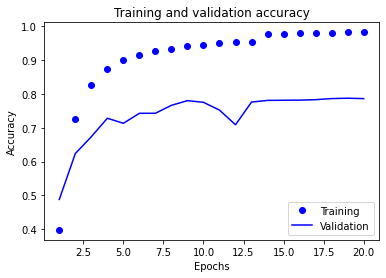

In [49]:
plot_epochs(range(1, len(loss) + 1),
acc, 'bo', 'Training', val_acc, 'b',
'Validation', 'Training and validation accuracy',
'Epochs', 'Accuracy')

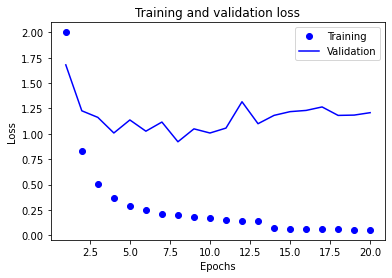

In [50]:
plot_epochs(range(1,len(loss) + 1),
            loss, 'bo','Training',
            val_loss,'b','Validation',
            'Training and validation loss',
            'Epochs','Loss')

8 epochs seem to be a good amount

### 3.5 Adding batch normalisation

In [51]:
normal_model = tf.keras.Sequential()
normal_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
normal_model.add(layers.MaxPooling2D((2,2)))
normal_model.add(layers.Dropout(0.5))
normal_model.add(layers.Conv2D(64, (3,3), activation='relu'))
normal_model.add(layers.BatchNormalization())
normal_model.add(layers.Conv2D(64, (3,3), activation='relu'))
normal_model.add(layers.Flatten())
normal_model.add(layers.Dropout(0.5))
normal_model.add(layers.Dense(128, activation='relu'))
normal_model.add(layers.BatchNormalization())
normal_model.add(layers.Dense(29, activation='softmax'))
normal_model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [52]:
normal_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)       

In [53]:
normal_model_history = normal_model.fit(train_dataset, 
                                            epochs=8, 
                                            batch_size=batch_size, 
                                            callbacks=callbacks, 
                                            validation_data=val_dataset)

Epoch 1/8
1088/1088 [==============================] - 184s 169ms/step - loss: 1.2648 - acc: 0.6316 - val_loss: 1.6609 - val_acc: 0.5595 - lr: 0.0010
Epoch 2/8
1088/1088 [==============================] - 187s 172ms/step - loss: 0.2434 - acc: 0.9229 - val_loss: 1.1272 - val_acc: 0.6854 - lr: 0.0010
Epoch 3/8
1088/1088 [==============================] - 190s 175ms/step - loss: 0.1261 - acc: 0.9588 - val_loss: 1.6777 - val_acc: 0.7149 - lr: 0.0010
Epoch 4/8
1088/1088 [==============================] - 191s 175ms/step - loss: 0.0870 - acc: 0.9709 - val_loss: 1.3885 - val_acc: 0.7128 - lr: 0.0010
Epoch 5/8
1088/1088 [==============================] - 191s 175ms/step - loss: 0.0660 - acc: 0.9779 - val_loss: 1.4215 - val_acc: 0.7276 - lr: 0.0010
Epoch 6/8
1088/1088 [==============================] - 194s 178ms/step - loss: 0.0538 - acc: 0.9821 - val_loss: 1.7536 - val_acc: 0.7237 - lr: 0.0010
Epoch 7/8
1088/1088 [==============================] - 201s 185ms/step - loss: 0.0465 - acc: 0.9837 

In [54]:
loss = normal_model_history.history['loss']
val_loss = normal_model_history.history['val_loss']
acc = normal_model_history.history['acc']
val_acc = normal_model_history.history['val_acc']

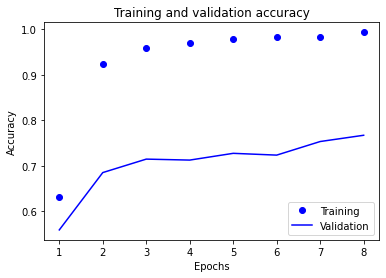

In [55]:
plot_epochs(range(1, len(loss) + 1),
acc, 'bo', 'Training', val_acc, 'b',
'Validation', 'Training and validation accuracy',
'Epochs', 'Accuracy')

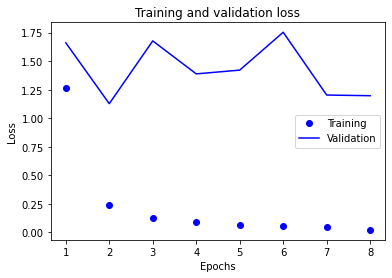

In [56]:
plot_epochs(range(1,len(loss) + 1),
            loss, 'bo','Training',
            val_loss,'b','Validation',
            'Training and validation loss',
            'Epochs','Loss')

## 4. Evaluating the best model

Based on the implemented models' results and choosing the best combination of validation loss and validation accuracy, the model chosen to test against the test data is the architecture used by the <b>dropout_model4</b> at <b>8 epochs</b>.

### 4.1 Training with the correct parameters

In [58]:
final_model = tf.keras.Sequential()
final_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
final_model.add(layers.MaxPooling2D((2,2)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Conv2D(64, (3,3), activation='relu'))
final_model.add(layers.MaxPooling2D((2,2)))
final_model.add(layers.Conv2D(64, (3,3), activation='relu'))
final_model.add(layers.Flatten())
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(128, activation='relu'))
final_model.add(layers.Dense(29, activation='softmax'))
final_model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])

In [59]:
final_model_history = final_model.fit(train_dataset, 
                                            epochs=8, 
                                            batch_size=batch_size, 
                                            callbacks=callbacks, 
                                            validation_data=val_dataset)

Epoch 1/8
1088/1088 [==============================] - 1262s 1s/step - loss: 2.0802 - acc: 0.3750 - val_loss: 1.9466 - val_acc: 0.4094 - lr: 0.0010
Epoch 2/8
1088/1088 [==============================] - 182s 167ms/step - loss: 0.8587 - acc: 0.7135 - val_loss: 1.3675 - val_acc: 0.5752 - lr: 0.0010
Epoch 3/8
1088/1088 [==============================] - 177s 163ms/step - loss: 0.5281 - acc: 0.8183 - val_loss: 1.2568 - val_acc: 0.6637 - lr: 0.0010
Epoch 4/8
1088/1088 [==============================] - 176s 162ms/step - loss: 0.3856 - acc: 0.8676 - val_loss: 1.1103 - val_acc: 0.6860 - lr: 0.0010
Epoch 5/8
1088/1088 [==============================] - 499s 459ms/step - loss: 0.3068 - acc: 0.8943 - val_loss: 1.2170 - val_acc: 0.6863 - lr: 0.0010
Epoch 6/8
1088/1088 [==============================] - 794s 729ms/step - loss: 0.2573 - acc: 0.9124 - val_loss: 1.1952 - val_acc: 0.6867 - lr: 0.0010
Epoch 7/8
1088/1088 [==============================] - 158s 146ms/step - loss: 0.2266 - acc: 0.9217 - 

### 4.2 Testing against the test set:

In [85]:
testing_imgdatagen = ImageDataGenerator(rescale=1/255.0)
test_dataset = testing_imgdatagen.flow_from_directory(
TEST_DIR,
target_size = (height, width),
class_mode='categorical',
batch_size = batch_size,
shuffle=False
)

Found 29 images belonging to 29 classes.


In [86]:
test_loss, test_acc =  final_model.evaluate(test_dataset)

1/1 [==============================] - 0s 87ms/step - loss: 0.1912 - acc: 0.9655


### 4.3 Testing against a different dataset:

In [88]:
EXTERNAL_TEST_DIR = 'external_asl_data/asl-alphabet-test'
external_dataset = testing_imgdatagen.flow_from_directory(
EXTERNAL_TEST_DIR,
target_size = (height, width),
class_mode='categorical',
batch_size = batch_size,
shuffle=False
)

Found 870 images belonging to 29 classes.


In [90]:
external_test_loss, external_test_acc =  final_model.evaluate(external_dataset)

14/14 [==============================] - 1s 65ms/step - loss: 13.2722 - acc: 0.3195


## 5. Results

In [93]:
# Get predictions for the test set
test_predictions = final_model.predict(test_dataset)
test_pred_labels = np.argmax(test_predictions, axis=1)

# Get predictions for the external test set
external_test_predictions = final_model.predict(external_dataset)
external_test_pred_labels = np.argmax(external_test_predictions, axis=1)

14/14 [==============================] - 1s 63ms/step


In [94]:
def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [96]:
# Create confusion matrix for the test set
test_true_labels = test_dataset.classes
test_confusion_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Create confusion matrix for the external test set
external_true_labels = external_dataset.classes
external_confusion_matrix = confusion_matrix(external_true_labels, external_test_pred_labels)

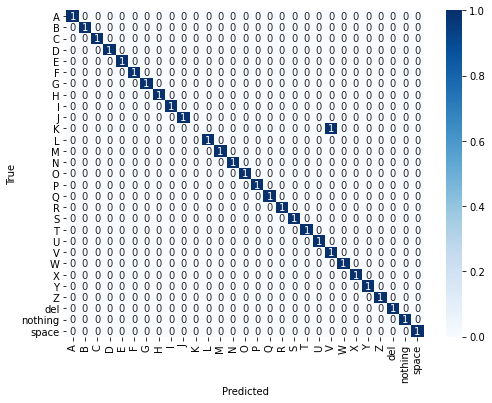

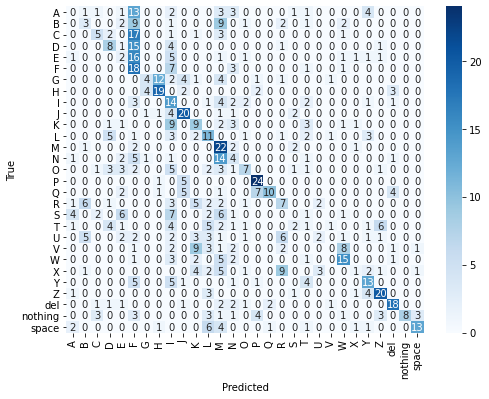

In [97]:
# Plot confusion matrix for the test set
plot_confusion_matrix(test_confusion_matrix, labels=test_dataset.class_indices.keys())

# Plot confusion matrix for the external test set
plot_confusion_matrix(external_confusion_matrix, labels=external_dataset.class_indices.keys())